# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Kesavaraj<br>
Roll Number:2022701008

### Dataset

Use the code below to load the Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

# from sklearn.datasets import make_moons
# X, y = make_moons(n_samples=100, noise=0.24)


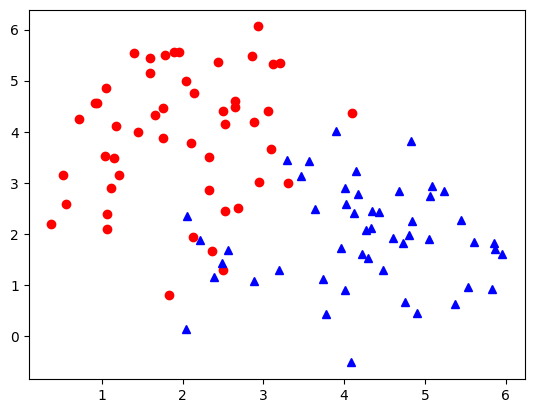

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

In [4]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [5]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [6]:
def gradients(X, y, y_hat):
    
    train = X.shape[0]
    dw = (1/train)*np.dot(X.T, (y_hat - y))
    db = (1/train)*np.sum((y_hat - y)) 
    
    return dw, db

In [7]:
def plot_decision_boundary(X, w, b):
        
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "o")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [8]:
def train(X, y, bs, epochs, lr):
     
    m, n = X.shape
    w = np.zeros((n,1))
    b = 0

    y = y.reshape(m,1)
    losses = []
    
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            dw, db = gradients(xb, yb, y_hat)
            
            w -= lr*dw
            b -= lr*db
        
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    return w, b, losses

In [9]:
def predict(X):
    preds = sigmoid(np.dot(X, w) + b)
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

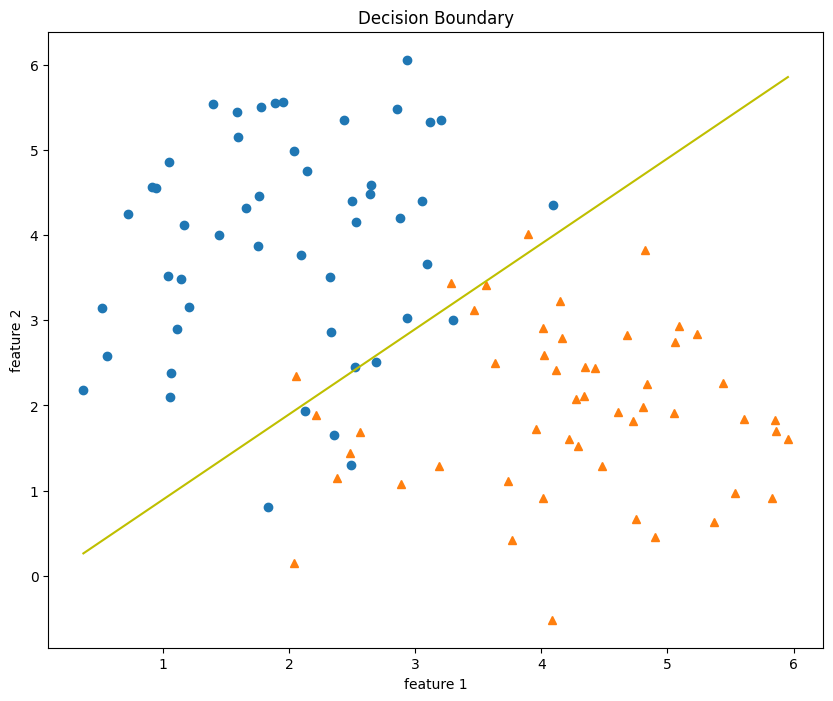

In [10]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)

# Plotting Decision Boundary
plot_decision_boundary(X, w, b)

### Questions

1) Explain the approach of Logistic Regression.<br>
step1: The sigmoid function in logistic regression returns a probability value that can then be mapped to two or more discrete classes. for the give input data, the goal is  to assign that data point to a category (either 1 or 0). The sigmoid function outputs the probability of the input points belonging to one of the classes.<br>

step2:Calculalting loss function which consits of weights.<br>

step3:Calculalting Gradient descent which is just the derivative of the loss function with respect to its weights.The weights are updated by subtracting the gradient descent times the learning rate<br>

2) What is the loss function used?<br>
The loss function for logistic regression is Log Loss<br>

3) Explain if we can use Mean Square Error(MSE) as Loss function.<br>
In Logistic Regression, if we use it will give a non-convex function. When we try to optimize values using gradient descent it will create complications to find global minima